In [65]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
import pandas as pd

#% matplotlib inline

# DATA ------------------------------------------------------------------------


In [96]:
import pandas as pd

df = pd.read_csv("MIDETROI.txt",delim_whitespace=True,header=None)   # df.to_csv('MIDETROIT.csv')
df.head()

,0,1,2,3
0,1,1,1995,34.1
1,1,2,1995,21.2
2,1,3,1995,20.6
3,1,4,1995,12.5
4,1,5,1995,8.1


In [97]:
df.columns=[['Month','day','year','Temp']]
df.head()

,Month,day,year,Temp
0,1,1,1995,34.1
1,1,2,1995,21.2
2,1,3,1995,20.6
3,1,4,1995,12.5
4,1,5,1995,8.1


In [99]:
df['k'] = np.arange(len(df))

In [87]:
#df.insert(4,'k','')

In [100]:
df.columns=[['Month','day','year','Temp','k']]
df.head()

,Month,day,year,Temp,k
0,1,1,1995,34.1,0
1,1,2,1995,21.2,1
2,1,3,1995,20.6,2
3,1,4,1995,12.5,3
4,1,5,1995,8.1,4


In [103]:
arr = np.array(df)
print(arr)

[[1.000e+00 1.000e+00 1.995e+03 3.410e+01 0.000e+00]
 [1.000e+00 2.000e+00 1.995e+03 2.120e+01 1.000e+00]
 [1.000e+00 3.000e+00 1.995e+03 2.060e+01 2.000e+00]
 ...
 [5.000e+00 1.100e+01 2.020e+03 4.030e+01 9.262e+03]
 [5.000e+00 1.200e+01 2.020e+03 4.540e+01 9.263e+03]
 [5.000e+00 1.300e+01 2.020e+03 4.360e+01 9.264e+03]]


In [260]:
k_values = arr[:,4]
T_values = arr[:,3]

x_samp = k_values
y_samp = T_values

import math

#x0    = numpy.array([0.0, 0.0, 0.0])



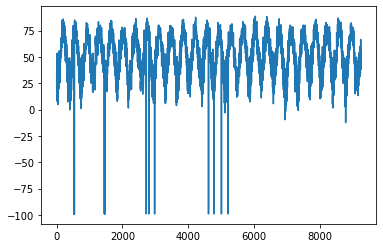

In [261]:
plt.plot(x_samp, y_samp)

In [262]:
# GENERAL EQUATION ------------------------------------------------------------
def func(x, A, B, C):
    return  A+ B*np.cos(x*2*np.pi/365.25)  + C*np.sin(x*2*np.pi/365.25)

from scipy.optimize import curve_fit

#import scipy.optimize as optimization

popt, pcov = curve_fit(func, x_samp, y_samp)
popt

array([ 50.44610109, -22.67032479,  -8.28241433])

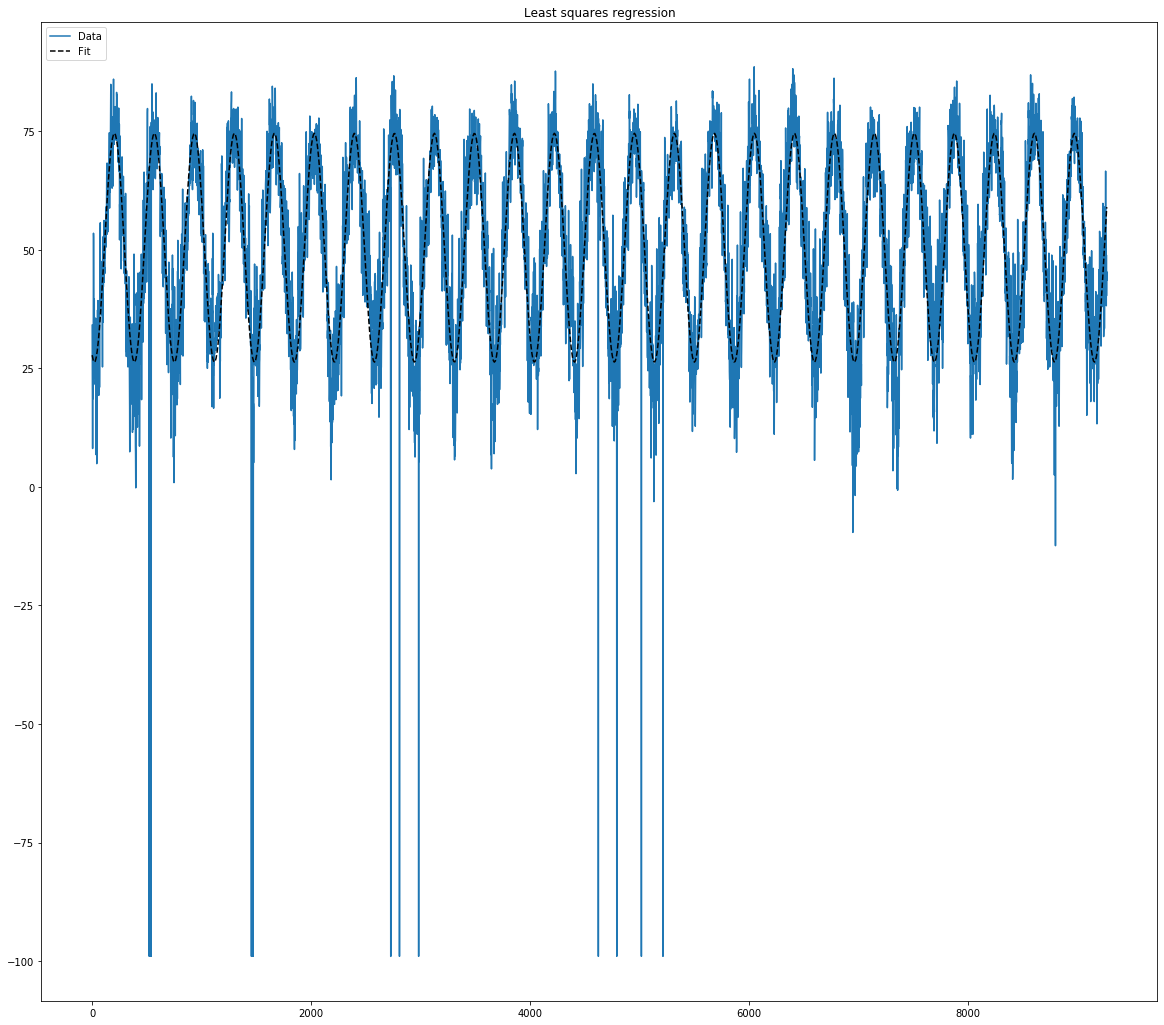

In [267]:
x_lin = np.linspace(0, 730, 730) 
x_full = np.linspace(0, x_samp.max(), 1000) 
y_full = func(x_full, 50.44610109, -22.67032479,  -8.28241433)
y_model = func(x_lin, 50.44610109, -22.67032479,  -8.28241433)

# PLOT ------------------------------------------------------------------------
# Visualize data and fitted curves
plt.figure(figsize=(20,18))
plt.plot(x_samp, y_samp, label="Data")
plt.plot(x_full, y_full, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")

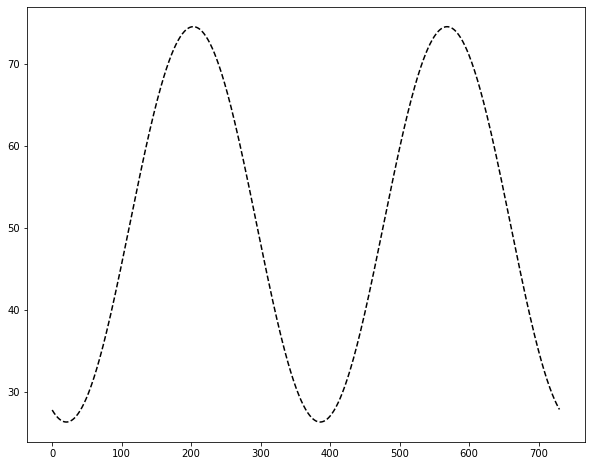

In [268]:
plt.figure(figsize=(10,8))
plt.plot(x_lin, y_model, "k--", label="Fit")

In [269]:
def f(x): return func(x, 50.44610109, -22.67032479,  -8.28241433)
max_x = opt.fmin(lambda x: -f(x), 0)
solutionmax = opt.minimize_scalar(lambda x: -f(x), bounds=[0,365], method='bounded')
solutionmin = opt.minimize_scalar(lambda x: f(x), bounds=[0,365], method='bounded')

Optimization terminated successfully.
         Current function value: -74.582008
         Iterations: 39
         Function evaluations: 78


In [270]:
solutionmax

     fun: -74.58200822476248
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 202.98703242834117

In [271]:
solutionmin

     fun: 26.31019395523753
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 20.362033177156658

In [203]:
def func(x, A, B, C, D):
    return  A+ B*np.cos(x*2*np.pi/365.25)  + C*np.sin(x*2*np.pi/365.25)+D*x*x

In [204]:
from scipy.optimize import curve_fit

In [208]:
#import scipy.optimize as optimization

popt, pcov = curve_fit(func, x_samp, y_samp)
popt

array([ 4.98129313e+01, -2.26820190e+01, -8.28513930e+00,  2.21349546e-08])

In [209]:
x_li = np.linspace(0, x_samp.max(), 1000) 
y_lin = np.linspace(0, y_samp.max(), 100) 
y_modelc = func(x_li, 4.98129313e+01, -2.26820190e+01, -8.28513930e+00,  2.21349546e-08)

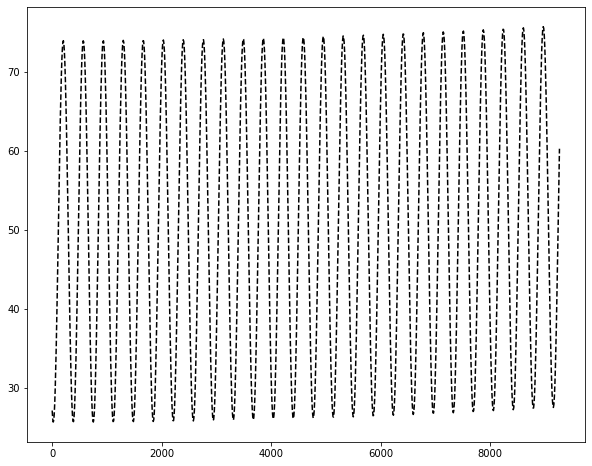

In [210]:
plt.figure(figsize=(10,8))
plt.plot(x_li, y_modelc, "k--", label="Fit")

In [290]:
import pandas as pd

bolt = pd.read_csv('bolt.csv', sep=',')

In [291]:
bolt.shape

(20, 3)

In [292]:
bolt.columns=[['time','bolt','Thompson']]
bolt.head()

,time,bolt,Thompson
0,0.00,0.0,0.0
1,0.01,0.0,0.0
2,1.10,5.0,4.9
3,3.00,22.5,22.6
4,4.00,34.0,34.0


In [293]:
table=np.array(bolt)
table

array([[0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e-02, 0.00e+00, 0.00e+00],
       [1.10e+00, 5.00e+00, 4.90e+00],
       [3.00e+00, 2.25e+01, 2.26e+01],
       [4.00e+00, 3.40e+01, 3.40e+01],
       [4.50e+00, 4.13e+01, 4.11e+01],
       [5.40e+00, 5.21e+01, 5.13e+01],
       [5.80e+00, 5.59e+01, 5.53e+01],
       [6.20e+00, 6.15e+01, 6.08e+01],
       [6.50e+00, 6.48e+01, 6.39e+01],
       [6.90e+00, 6.96e+01, 6.85e+01],
       [7.30e+00, 7.33e+01, 7.21e+01],
       [7.70e+00, 7.85e+01, 7.71e+01],
       [8.00e+00, 8.17e+01, 7.99e+01],
       [8.30e+00, 8.56e+01, 8.38e+01],
       [8.60e+00, 8.92e+01, 8.75e+01],
       [8.80e+00, 9.13e+01, 8.94e+01],
       [9.40e+00, 9.86e+01, 9.64e+01],
       [9.69e+00, 1.00e+02,      nan],
       [9.89e+00,      nan, 1.00e+02]])

In [294]:
table[18,2]= (table[17,2]+table[19,2])/2;
table

array([[0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e-02, 0.00e+00, 0.00e+00],
       [1.10e+00, 5.00e+00, 4.90e+00],
       [3.00e+00, 2.25e+01, 2.26e+01],
       [4.00e+00, 3.40e+01, 3.40e+01],
       [4.50e+00, 4.13e+01, 4.11e+01],
       [5.40e+00, 5.21e+01, 5.13e+01],
       [5.80e+00, 5.59e+01, 5.53e+01],
       [6.20e+00, 6.15e+01, 6.08e+01],
       [6.50e+00, 6.48e+01, 6.39e+01],
       [6.90e+00, 6.96e+01, 6.85e+01],
       [7.30e+00, 7.33e+01, 7.21e+01],
       [7.70e+00, 7.85e+01, 7.71e+01],
       [8.00e+00, 8.17e+01, 7.99e+01],
       [8.30e+00, 8.56e+01, 8.38e+01],
       [8.60e+00, 8.92e+01, 8.75e+01],
       [8.80e+00, 9.13e+01, 8.94e+01],
       [9.40e+00, 9.86e+01, 9.64e+01],
       [9.69e+00, 1.00e+02, 9.82e+01],
       [9.89e+00,      nan, 1.00e+02]])

In [295]:
tb = table[0:18, 0]
tt = table[0:19, 0]


b_dist = table[0:18,1]
t_dist = table[0:19,2]

b_samp = b_dist
t_samp = t_dist

tb_samp = tb 
tt_samp = tt 


import math

#x0    = numpy.array([0.0, 0.0, 0.0])

In [296]:
# GENERAL EQUATION ------------------------------------------------------------
def func(t, a, v0, x0):
    return  a/2*t*t+ v0*t + x0

from scipy.optimize import curve_fit

#import scipy.optimize as optimization

popt, pcov = curve_fit(func, tb_samp, b_samp)
popt

array([ 0.53996374,  8.28070397, -1.71191566])

In [299]:
# GENERAL EQUATION ------------------------------------------------------------
def fun(t, a, v0, x0):
    return  a/2*t*t+ v0*t + x0

from scipy.optimize import curve_fit

#import scipy.optimize as optimization

popt, pcov = curve_fit(fun, tt_samp, t_samp)
popt

array([ 0.39516373,  8.64950506, -1.91512335])

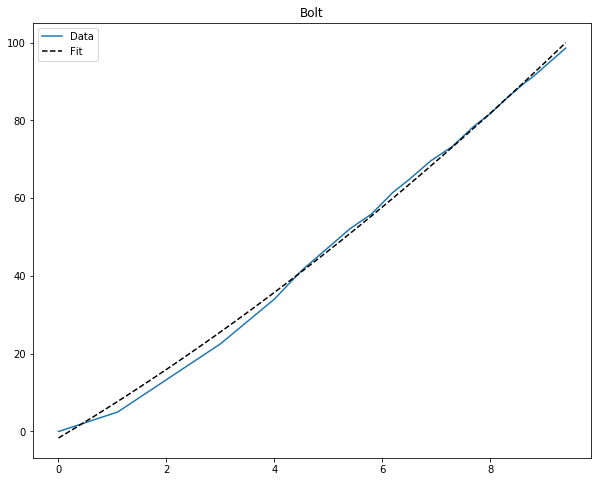

In [298]:
#b_lin = np.linspace(0, 365, 365) 
tb_full = np.linspace(0, tb_samp.max(), 30) 
#y_full = func(x_full, 50.44610109, -22.67032479,  -8.28241433)
b_model = func(tb_full, 0.53996374,  8.28070397, -1.71191566)

# PLOT ------------------------------------------------------------------------
# Visualize data and fitted curves
plt.figure(figsize=(10,8))
plt.plot(tb_samp, b_samp, label="Data")
plt.plot(tb_full, b_model, "k--", label="Fit")
plt.title("Bolt")
plt.legend(loc="upper left")

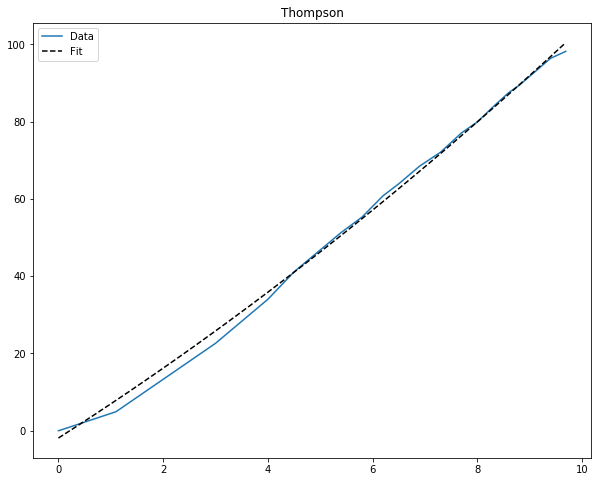

In [300]:
#b_lin = np.linspace(0, 365, 365) 
tt_full = np.linspace(0, tt_samp.max(), 30) 
#y_full = func(x_full, 50.44610109, -22.67032479,  -8.28241433)
t_model = func(tt_full, 0.39516373,  8.64950506, -1.91512335)

# PLOT ------------------------------------------------------------------------
# Visualize data and fitted curves
plt.figure(figsize=(10,8))
plt.plot(tt_samp, t_samp, label="Data")
plt.plot(tt_full, t_model, "k--", label="Fit")
plt.title("Thompson")
plt.legend(loc="upper left")

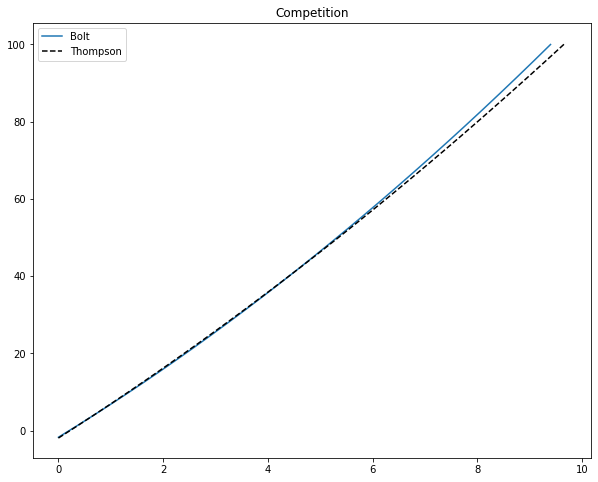

In [301]:
plt.figure(figsize=(10,8))
plt.plot(tb_full, b_model, label="Bolt")
plt.plot(tt_full, t_model, "k--", label="Thompson")
plt.title("Competition")
plt.legend(loc="upper left")

In [302]:
t5 = table[0:5, 0]
#tt5 = table[0:5, 0]


b5_dist = table[0:5,1]
t5_dist = table[0:5,2]

b5_samp = b5_dist
th5_samp = t5_dist

t5_samp = t5 
#tt_samp = tt 


In [303]:
popt, pcov = curve_fit(func, t5, b5_dist)
popt



array([ 2.42389158,  3.74319987, -0.12451425])

In [304]:
popt, pcov = curve_fit(fun, t5_samp, th5_samp)
popt

array([ 2.43373304,  3.73897625, -0.14345813])

 Disclaimer:  Not an inversting advice, take your own risk!    Data from investing.com
openinging price of MSFT at 2023-0101 would be around  [354.28863224]
Your investments will have a CAGR of  [19.69590999] %


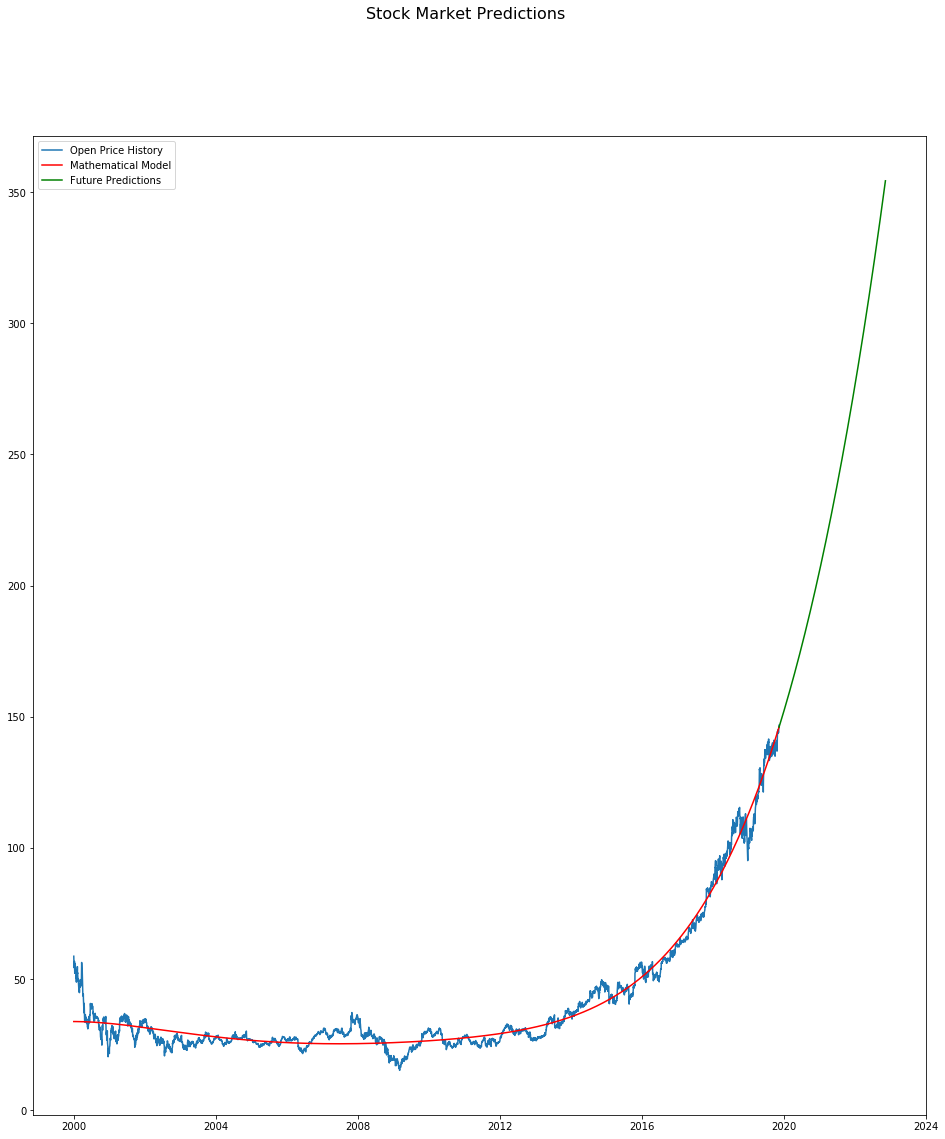

In [380]:

#import packages
import pandas as pd
import numpy as np

df = pd.read_csv('MSFTHistoricalData.csv')
df.head()

from sklearn.linear_model import LinearRegression

#for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

#to plot within notebook
import matplotlib.pyplot as plt

#function to calculate compound annual growth rate
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100

#Read the data file
df = pd.read_csv('MSFTHistoricalData.csv')

#Setting index as date
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

#Converting dates into number of days as dates cannot be passed directly 
#to any regression model
df.index = (df.index - pd.to_datetime('2000-01-01')).days

#Convert the pandas series into numpy array, we need to further 
#massage it before sending it to regression model
a = np.asarray(df['Open'])
b = np.asarray(df.index.values)

y = a.astype(np.float)
x = b.astype(np.float)

df.shape

#Model initialization
#by default the degree of the equation is 1.
#Hence the mathematical model equation is y = mx + c, 
#which is an equation of a line.
regression_model = LinearRegression()

#Choose the order of your polynomial. Here the degree is set to 5.
#hence the mathematical model equation is 
#y = c0 + c1.x**1 + c2.x**2+....+ c5.x**5
poly = PolynomialFeatures(5)



#Convert dimension x in the higher degree polynomial expression
X_transform = poly.fit_transform(x.reshape(-1, 1))

#Fit the data(train the model)
regression_model.fit(X_transform, y.reshape(-1, 1))



# Prediction for historical dates. Let's call it learned values.
y_learned = regression_model.predict(X_transform)

#Now, add future dates to the date index and pass that index to 
#the regression model for future prediction.
#As we have converted date index into a range index, hence, here we 
#just need to add 3650 days ( roughly 10 yrs)
#to the previous index. x[-1] gives the last value of the series.
newindex = np.asarray(pd.RangeIndex(start=x[0], stop=x[0] + 365*3))

#Convert the extended dimension x in the higher degree polynomial expression
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))

#Prediction for future dates. Let's call it predicted values.
y_predict = regression_model.predict(X_extended_transform)

#Print the last predicted value

print (" Disclaimer:  Not an inversting advice, take your own risk!    Data from investing.com" )
print ("openinging price of MSFT at 2023-0101 would be around ", y_predict[-1])




#Convert the days index back to dates index for plotting the graph
x = pd.to_datetime(df.index, origin='2000-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='2000-01-01', unit='D')

#Print CAGR for next ten years.
print ('Your investments will have a CAGR of ',(CAGR(y[-1], y_predict[-1], 10)), '%')

#Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#Plot the actual data
plt.figure(figsize=(16,18))
plt.plot(x,df['Open'], label='Open Price History')

#Plot the regression model
plt.plot(x,y_learned, color='r', label='Mathematical Model')

#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='Future Predictions')

#Set the title of the graph
plt.suptitle('Stock Market Predictions', fontsize=16)

#Set the title of the graph window
fig = plt.gcf()
fig.canvas.set_window_title('Stock price of MSFT Predictions')

#display the legends
plt.legend()
#display the graph
plt.show()



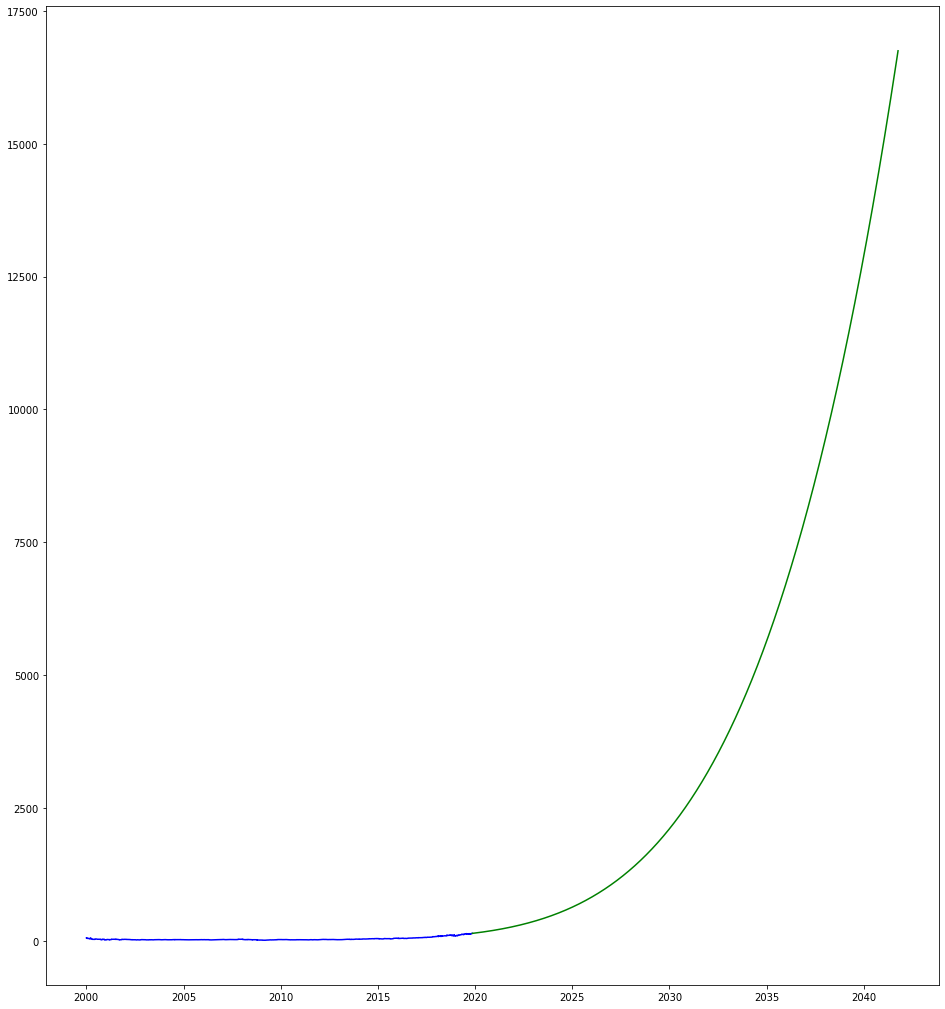

In [379]:
#Plot the actual data
plt.figure(figsize=(16,18))
plt.plot(x,df['Open'],color='blue', label='Open Price History')

#Plot the regression model
#plt.plot(x,y_learned, color='r', label='Mathematical Model')

#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='Future Predictions')

# #Set the title of the graph
# plt.suptitle('Stock Market Predictions', fontsize=16)

# #Set the title of the graph window
# fig = plt.gcf()
# fig.canvas.set_window_title('Stock price of MSFT Predictions')

# #display the legends
# plt.legend()
# #display the graph
# plt.show()

In [354]:
x

DatetimeIndex(['2019-11-13', '2019-11-12', '2019-11-11', '2019-11-08',
               '2019-11-07', '2019-11-06', '2019-11-05', '2019-11-04',
               '2019-11-01', '2019-10-31',
               ...
               '2000-01-14', '2000-01-13', '2000-01-12', '2000-01-11',
               '2000-01-10', '2000-01-07', '2000-01-06', '2000-01-05',
               '2000-01-04', '2000-01-03'],
              dtype='datetime64[ns]', name='Date', length=5000, freq=None)

In [378]:
future_x

DatetimeIndex(['2019-11-13', '2019-11-14', '2019-11-15', '2019-11-16',
               '2019-11-17', '2019-11-18', '2019-11-19', '2019-11-20',
               '2019-11-21', '2019-11-22',
               ...
               '2041-09-28', '2041-09-29', '2041-09-30', '2041-10-01',
               '2041-10-02', '2041-10-03', '2041-10-04', '2041-10-05',
               '2041-10-06', '2041-10-07'],
              dtype='datetime64[ns]', length=8000, freq=None)

In [356]:
df.index

Int64Index([7256, 7255, 7254, 7251, 7250, 7249, 7248, 7247, 7244, 7243,
            ...
              13,   12,   11,   10,    9,    6,    5,    4,    3,    2],
           dtype='int64', name='Date', length=5000)

In [367]:
newindex

array([   2,    3,    4, ..., 7999, 8000, 8001], dtype=int64)

In [368]:
a = np.asarray(df['Open'])
b = np.asarray(df.index.values)

y = a.astype(np.float)
x = b.astype(np.float)
x

array([7.256e+03, 7.255e+03, 7.254e+03, ..., 4.000e+00, 3.000e+00,
       2.000e+00])

In [371]:
x

DatetimeIndex(['2019-11-13', '2019-11-12', '2019-11-11', '2019-11-08',
               '2019-11-07', '2019-11-06', '2019-11-05', '2019-11-04',
               '2019-11-01', '2019-10-31',
               ...
               '2000-01-14', '2000-01-13', '2000-01-12', '2000-01-11',
               '2000-01-10', '2000-01-07', '2000-01-06', '2000-01-05',
               '2000-01-04', '2000-01-03'],
              dtype='datetime64[ns]', name='Date', length=5000, freq=None)